In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import os
import scanpy as sc
import squidpy as sq
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.metrics.cluster import adjusted_rand_score

In [2]:
input_dir = "../../results/05_snakemake_clustering/output/clustering"
out_dir = '../../results/05_snakemake_clustering/03_eva_clustering'

In [3]:
os.makedirs(out_dir, exist_ok=True)

In [4]:
clustering_method_list = ['Leiden', 'Kmeans', 'BayesSpace', 'Banksy']

svg_method_list = ['nnSVG', 'Spanve',  'SPARK-X', 'SPARK', 'SpatialDE2',
                   'SpatialDE', 'SOMDE', 'MoranI', 'scGCO', 'SpaGCN',
                   'SpaGFT', 'Sepal', 'HVG', 'BOOST-GP', 'GPcounts']

dataset_list = ['151507', '151508', '151509', '151510', '151669', '151670', 
                '151671', '151672', '151673', '151674', '151675', '151676']

In [5]:
n_genes, clustering_methods, svg_methods, datasets, aris = [], [], [], [], []

for n_gene in [500, 1000, 1500, 2000]:
    for clustering_method in clustering_method_list:
        for svg_method in svg_method_list:
            for dataset in dataset_list:
                filename = f'{input_dir}/{clustering_method}/{svg_method}/{dataset}_{n_gene}.csv'

                df = pd.read_csv(filename, index_col=0)
                ari = adjusted_rand_score(df['spatialLIBD'], df['clusters'])

                clustering_methods.append(clustering_method)
                svg_methods.append(svg_method)
                datasets.append(dataset)
                aris.append(ari)
                n_genes.append(n_gene)

In [6]:
df = pd.DataFrame(data={"clustering_method": clustering_methods, 
                        "svg_method": svg_methods, 
                        "dataset": datasets, 
                        "n_gene": n_genes,
                        "ari": aris})

<Axes: xlabel='svg_method', ylabel='ari'>

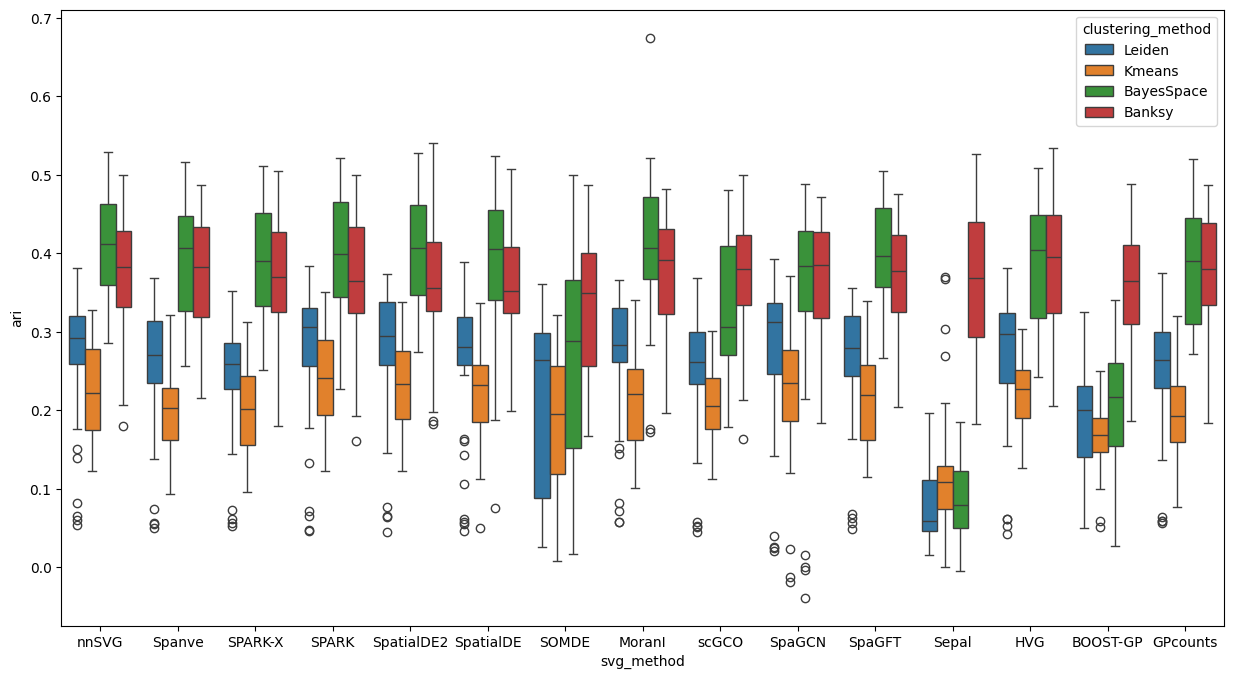

In [7]:
plt.figure(figsize=(15,8))

sns.boxplot(df, x='svg_method', y='ari', hue='clustering_method')

In [8]:
df.to_csv(f'{out_dir}/ari.csv')